In [2]:
# importing nessesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Now we import the dataset

df=pd.read_csv('Group_6_data_cleaned.csv')
df.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


# Using Corr for the variable selection

In [4]:
corr_matrix = df.corr()

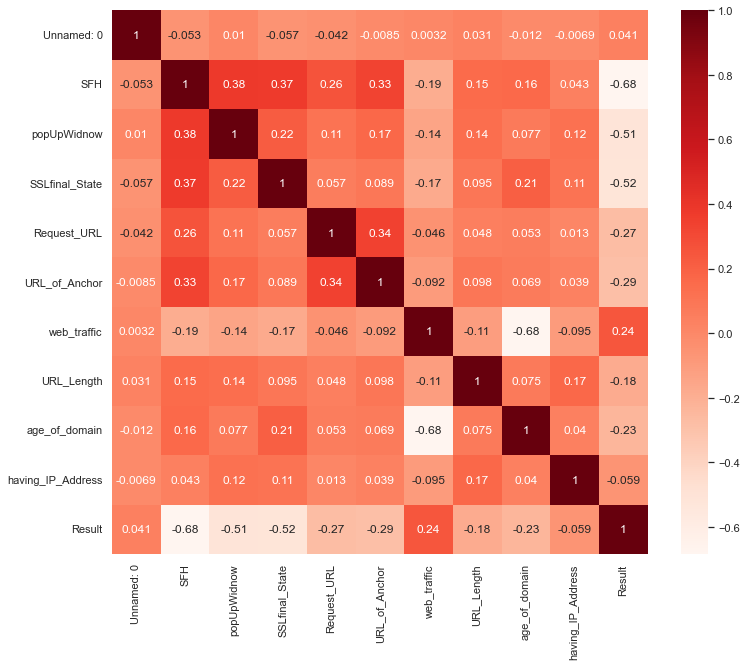

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

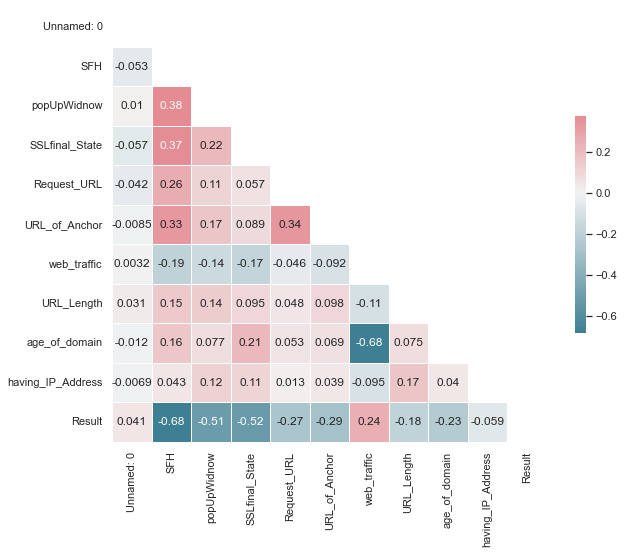

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()



## By considering the cut-off as 0.3 for the result with the relation to individual input variable. We should consider top 3 input variables effecting the output are the input variables "SFH", "popUpWindow", "SSLfinal_State"

# Using Lasso for the variable selection

In [5]:
X = df.drop(["Result"], axis = 1)

y = df["Result"]



In [6]:
# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y= oversample.fit_resample(X, y)

In [7]:
#split dataset
X_train_total, X_test, y_train_total, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_total, y_train_total, test_size=0.15, random_state=42)

print(X_train_total.shape,X_train.shape,X_valid.shape,X_test.shape)

(1684, 10) (1431, 10) (253, 10) (422, 10)


In [59]:
from sklearn.linear_model import Lasso

# Fit a Lasso model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)



Lasso(alpha=0.1)

In [60]:
# Get the coefficients and their magnitudes
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': model.coef_, 'abs_coefficient': abs(model.coef_)})
coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

# Print the top 10 features selected by Lasso
print(coef_df.head(10))

          feature  coefficient  abs_coefficient
0             SFH    -0.313542         0.313542
1  SSLfinal_State    -0.191424         0.191424
2     popUpWidnow    -0.117406         0.117406
4   URL_of_Anchor    -0.025556         0.025556
5   age_of_domain    -0.015031         0.015031
3     Request_URL    -0.014874         0.014874
6      URL_Length    -0.000000         0.000000


In [61]:
# Make predictions on the test set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.4881516587677725


Lasso (Least Absolute Shrinkage and Selection Operator) is a machine learning algorithm that is commonly used for feature selection and regularization in linear regression. It was introduced in 1996 by Robert Tibshirani.

The Lasso algorithm works by adding a penalty term to the loss function of the linear regression model. This penalty term is proportional to the absolute value of the coefficients of the model. By doing so, the Lasso algorithm encourages the model to have smaller coefficient values and thus, forces some coefficients to be exactly zero. This is why Lasso is often used for feature selection, as it can effectively eliminate irrelevant or redundant features from the model.

The amount of regularization in Lasso is controlled by a hyperparameter called alpha. A larger value of alpha results in more regularization and fewer non-zero coefficients, while a smaller value of alpha results in less regularization and more non-zero coefficients. The optimal value of alpha can be determined using cross-validation.

Overall, Lasso is a powerful technique for feature selection and regularization in linear regression, and it has been successfully applied in many different fields, including finance, biology, and computer science.

Text(0.5, 1.0, 'Feature importance using Lasso Model')

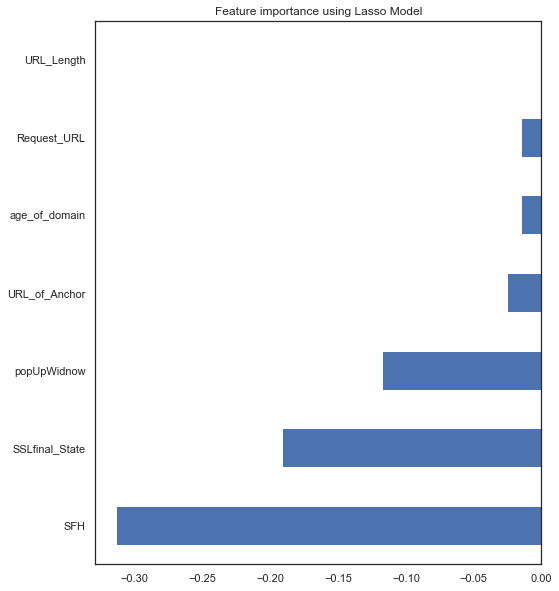

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
coef = pd.Series(model.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [63]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Create LassoCV object with cross-validation
model_1 = LassoCV(cv=5)

# Fit model on training data
model_1.fit(X_train, y_train)

# Predict on test data
y_pred = model_1.predict(X_test)

# Evaluate model performance on test data
mse = mean_squared_error(y_test, y_pred)
print("MSE on test data:", mse)
print("Best alpha:", model_1.alpha_)


MSE on test data: 0.3180930570952843
Best alpha: 0.005053788610099062


In [64]:
from sklearn.linear_model import Lasso
model_1 = Lasso(alpha=0.005053788610099062)
model_1.fit(X_train, y_train)


Lasso(alpha=0.005053788610099062)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

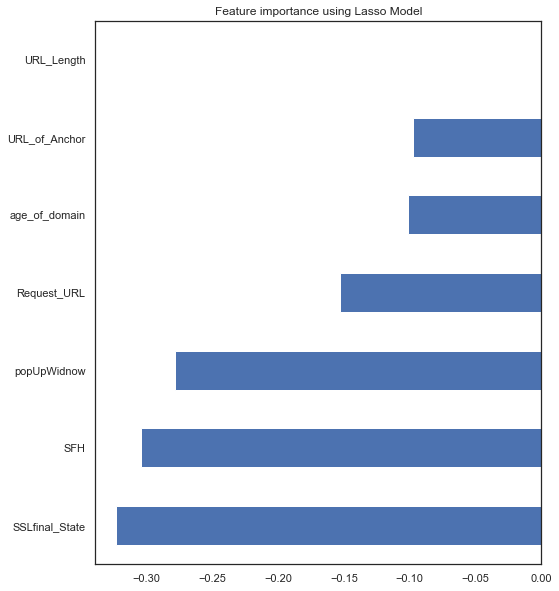

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
coef = pd.Series(model_1.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [67]:
X =df[['SFH','SSLfinal_State','popUpWidnow','Request_URL','URL_of_Anchor','age_of_domain']]
y=df['Result']

# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y= oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Best model from part 2- Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, 
                               max_features = "sqrt", 
                               max_depth = 90,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=20,
                       oob_score=True)

In [69]:
importances = model.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

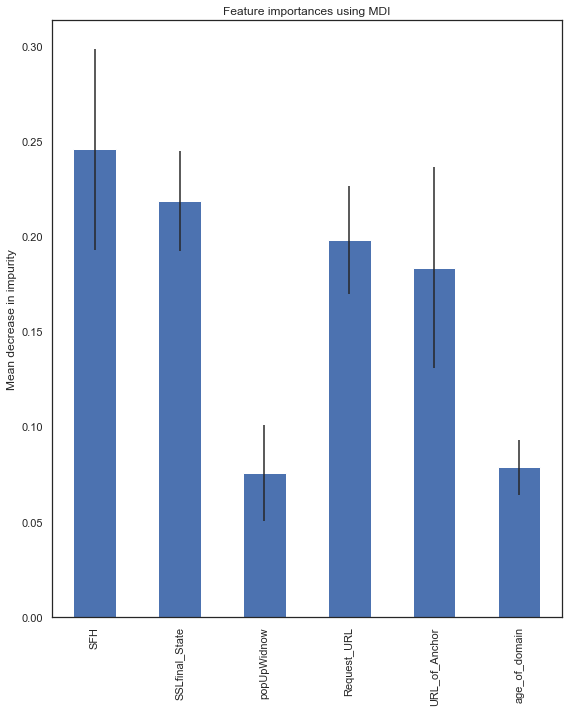

In [70]:
import pandas as pd
feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [71]:
model = RandomForestClassifier(n_estimators = 20, 
                               max_features = "sqrt", 
                               max_depth = 90,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=20,
                       oob_score=True)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train, y_train)
forest_y_pred = model.predict(X_test)
print(f"Random Forest Classification Report on Test data using best model")
cm=confusion_matrix(y_test, forest_y_pred)
print(cm)
print(classification_report(y_test, forest_y_pred), "\n")
print('Random Forest accuracy :',accuracy_score(y_test,forest_y_pred))

Random Forest Classification Report on Test data using best model
[[121   8   9]
 [  3 130   8]
 [ 12  14 117]]
              precision    recall  f1-score   support

          -1       0.89      0.88      0.88       138
           0       0.86      0.92      0.89       141
           1       0.87      0.82      0.84       143

    accuracy                           0.87       422
   macro avg       0.87      0.87      0.87       422
weighted avg       0.87      0.87      0.87       422
 

Random Forest accuracy : 0.8720379146919431


## Best model from part 3- ELM

In [9]:
from skelm import ELMClassifier
model_2 = ELMClassifier(alpha=0.001, n_neurons=1000)
model_2.fit(X_train,y_train)

ELMClassifier(alpha=0.001, n_neurons=1000)

In [10]:
y_pred_test= model_2.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8151658767772512

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(f"ELM Classification Report on Test data using best model")
cm=confusion_matrix(y_test, y_pred_test)
print(cm)
print(classification_report(y_test, y_pred_test), "\n")
print('ELM accuracy :',accuracy_score(y_test,y_pred_test))

ELM Classification Report on Test data using best model
[[114  17   7]
 [  3 124  14]
 [ 14  23 106]]
              precision    recall  f1-score   support

          -1       0.87      0.83      0.85       138
           0       0.76      0.88      0.81       141
           1       0.83      0.74      0.79       143

    accuracy                           0.82       422
   macro avg       0.82      0.82      0.82       422
weighted avg       0.82      0.82      0.81       422
 

ELM accuracy : 0.8151658767772512
